# SQL

In [1]:
# load the libraries
import mysql.connector as cn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
mydb = cn.connect(
    host = 'localhost',
    user = 'root',
    passwd = input('Input Password MySQL : '),
    database = input('Choose the database : ')
)

# in this case we will use 'employees' database

In [6]:
mycursor = mydb.cursor()

def query (x) :
    mycursor.execute (x)
    result = mycursor.fetchall()
    df = pd.DataFrame(result, columns = mycursor.column_names)
    return df

In [4]:
query(
    '''
    show tables
    '''
)

,Tables_in_employees
0,current_dept_emp
1,departments
2,dept_emp
3,dept_emp_latest_date
4,dept_manager
5,employees
6,salaries
7,titles


In [5]:
first = query(
    '''
    SELECT * FROM employees;
    '''
)
first

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


# Bagian 1 : SQL + DA
1. Gunakan database employees
2. Tunjukan top 5 dari first name dari table employees yang memiliki frekuensi terbanyak. Tunjukan dalam bentuk tabel dan grafik yang tepat.
3. Perlihatkan first name, last name, birthdate, gender, dan nama department dari manager di setiap departments dari waktu ke waktu. (Clue : tabel utama yang dipakai adalah employees dan dept_manager namun bukan berarti hanya 2 tabel ini yang digunakan). Tampilkan juga jumlah total gaji manager dalam periode waktunya tersebut. 
4. Coba tampilkan first name, last name, salary, dan nama departments dari karyawan yang memiliki gaji diatas rata-rata.
5. Perlihatkan 3 orang yang memiliki total gaji terbanyak. Dari 3 orang tersebut, perlihatkan perkembangan gaji ke-3 orang tersebut dari waktu ke waktu menggunakan grafik yang tepat.
6. Tampilkan first name, last name, nama department, dan title dimana employees menjadi tabel utama. Perlihatkan juga dalam bentuk visual top 5 nama department dan title yang memiliki jumlah pegawai yang paling banyak.
7. Tampilkan first name, last name, gender, dan total gaji dari 10 karyawan yang memiliki 10 gaji terkecil.

Show the top 5 of the first names from the table employees who have the most frequency. Show it in the form of appropriate tables and graphs.

In [7]:
x1 = first['first_name'].value_counts().head().index
y1 = first['first_name'].value_counts().head().values
print(x1)
print(y1)

Index(['Shahab', 'Tetsushi', 'Elgin', 'Anyuan', 'Huican'], dtype='object')
[295 291 279 278 276]


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TOP 5 EMPLOYEES NAME WHO HAVE THE MOST FREQUENCY')

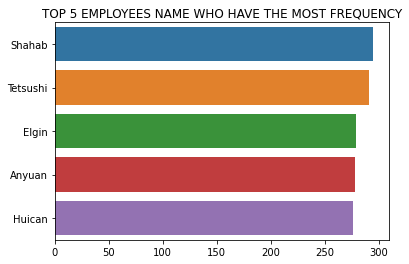

In [9]:
sns.barplot(y1, x1)
plt.title("TOP 5 EMPLOYEES NAME WHO HAVE THE MOST FREQUENCY")

Show the first name, last name, birthdate, gender, and department name of the manager in each department from time to time. Also show the total amount of manager's salary in that time period.

In [10]:
dt2 = query(
    '''
    SELECT E.first_name, E.last_name, E.birth_date, E.gender, D.dept_name, sum(S.salary) as TOTAL_MANAGER_SALARY 
    FROM dept_manager DM
    JOIN employees E
    ON DM.emp_no = E.emp_no
    JOIN departments D
    ON DM.dept_no = D.dept_no
    JOIN salaries S
    ON E.emp_no = S.emp_no
    WHERE DM.to_date = '9999-01-01'
    GROUP BY E.emp_no;
    '''
)


dt2

,first_name,last_name,birth_date,gender,dept_name,TOTAL_MANAGER_SALARY
0,Vishwani,Minakawa,1963-06-21,M,Marketing,1488700
1,Isamu,Legleitner,1957-03-28,F,Finance,1238562
2,Karsten,Sigstam,1958-12-02,F,Human Resources,964474
3,Oscar,Ghazalie,1963-07-27,M,Production,515381
4,Leon,DasSarma,1964-04-25,F,Development,902149
5,Dung,Pesch,1960-08-19,M,Quality Management,836280
6,Hauke,Zhang,1955-03-16,M,Sales,1398754
7,Hilary,Kambil,1952-06-27,F,Research,988750
8,Yuchang,Weedman,1960-03-25,M,Customer Service,697675


Try displaying the first name, last name, salary, and department names of employees who have above average salaries.

In [ ]:
query(
    '''
    SELECT E.first_name, E.last_name,MAX(S.salary), D.dept_name
    FROM employees E
    JOIN dept_emp DE
    ON DE.emp_no = E.emp_no
    JOIN departments D
    ON DE.dept_no = D.dept_no
    JOIN salaries S
    ON E.emp_no = S.emp_no
    WHERE S.salary > (SELECT AVG(salary) FROM salaries)
    GROUP BY E.emp_no
    '''
)

,first_name,last_name,max(S.salary),dept_name
0,Georgi,Facello,88958,Development
1,Bezalel,Simmel,72527,Sales
2,Chirstian,Koblick,74057,Production
3,Kyoichi,Maliniak,94692,Human Resources
4,Tzvetan,Zielinski,88070,Research
...,...,...,...,...
178039,Keiichiro,Lindqvist,70425,Finance
178040,Siamak,Salverda,80389,Marketing
178041,Zito,Baaz,69501,Production
178042,Berhard,Lenart,83441,Development


Show 3 people who have the highest total salary. Of the 3 people, show the progress of the salary of the 3 people from time to time using the right graph.

In [13]:
query(
    '''
    SELECT E.emp_no, E.first_name, E.last_name,SUM(S.salary) AS SALARY, D.dept_name
    FROM employees E
    JOIN dept_emp DE
    ON DE.emp_no = E.emp_no
    JOIN departments D
    ON DE.dept_no = D.dept_no
    JOIN salaries S
    ON E.emp_no = S.emp_no
    GROUP BY E.emp_no
    ORDER BY SUM(S.salary) desc
    LIMIT 3
    '''
)

,emp_no,first_name,last_name,SALARY,dept_name
0,96957,Odoardo,Lindenbaum,4541798,Customer Service
1,485205,Yefim,Taneja,4467518,Customer Service
2,89825,Ingmar,Isard,4389576,Marketing


In [14]:
TOP_3_SALARY = query(
    '''
    SELECT E.first_name, E.last_name, S.from_date, S.salary
    FROM employees E
    JOIN salaries S
    ON E.emp_no = S.emp_no
    WHERE E.emp_no = 96957
    or E.emp_no = 485205
    or E.emp_no = 89825;
    '''
)
TOP_3_SALARY.insert(1,'Name',TOP_3_SALARY['first_name'] + " " + TOP_3_SALARY['last_name'])
TOP_3_SALARY.drop(['first_name','last_name'],axis=1,inplace=True)
TOP_3_SALARY


,Name,from_date,salary
0,Ingmar Isard,1986-05-23,109757
1,Ingmar Isard,1987-05-23,113028
2,Ingmar Isard,1988-05-22,117302
3,Ingmar Isard,1989-05-22,120870
4,Ingmar Isard,1990-05-22,120773
5,Ingmar Isard,1991-05-22,122887
6,Ingmar Isard,1992-05-21,124497
7,Ingmar Isard,1993-05-21,127826
8,Ingmar Isard,1994-05-21,130703
9,Ingmar Isard,1995-05-21,133234


In [15]:
TOP_3_SALARY['from_date'] = pd.to_datetime(TOP_3_SALARY['from_date'])
TOP_3_SALARY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       53 non-null     object        
 1   from_date  53 non-null     datetime64[ns]
 2   salary     53 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ KB


<AxesSubplot:xlabel='from_date', ylabel='salary'>

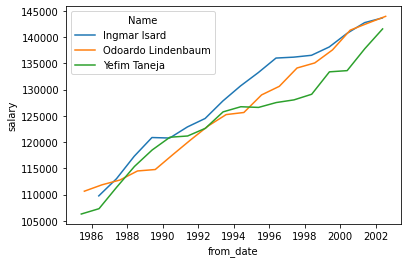

In [16]:
sns.lineplot(x = TOP_3_SALARY['from_date'],y = TOP_3_SALARY['salary'],hue = TOP_3_SALARY['Name'])

Display the first name, last name, department name, and title where employees are the main table. Also show in a visual form the top 5 department names and titles that have the highest number of employees.

In [18]:
TOP_5_DEPT = query(
    '''
    SELECT E.first_name, E.last_name, D.dept_name, T.title
    FROM employees E
    JOIN dept_emp DE 
    ON E.emp_no = DE.emp_no
    JOIN departments D
    ON D.dept_no = DE.dept_no
    JOIN titles T
    ON E.emp_no = T.emp_no;
    '''
)
TOP_5_DEPT

,first_name,last_name,dept_name,title
0,Mary,Sluis,Customer Service,Staff
1,Huan,Lortz,Customer Service,Senior Staff
2,Huan,Lortz,Customer Service,Staff
3,Basil,Tramer,Customer Service,Senior Staff
4,Basil,Tramer,Customer Service,Staff
...,...,...,...,...
489898,Nathan,Ranta,Sales,Senior Staff
489899,Nathan,Ranta,Sales,Staff
489900,Rimli,Dusink,Sales,Staff
489901,Bangqing,Kleiser,Sales,Senior Staff


Development         125586
Production          107608
Sales                78001
Customer Service     35075
Research             31461
Name: dept_name, dtype: int64


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'TOP 5 DEPARTMENT')

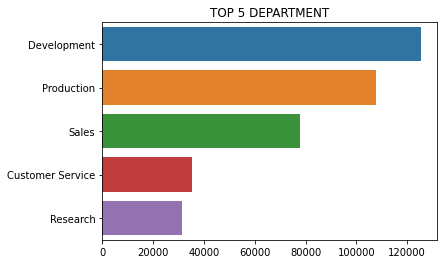

In [20]:
x1 = TOP_5_DEPT['dept_name'].value_counts().head().index
y1 = TOP_5_DEPT['dept_name'].value_counts().head().values
print(TOP_5_DEPT['dept_name'].value_counts().head())
sns.barplot(y1,x1)
plt.title("TOP 5 DEPARTMENT")


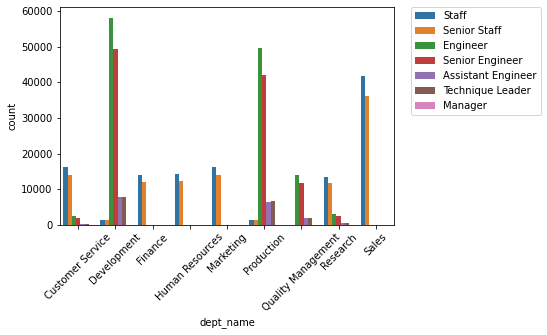

In [129]:
sns.countplot(data = TOP_5_DEPT, x = 'dept_name',hue= 'title')
plt.xticks(rotation = 45)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Display the first name, last name, gender, and total salary of the 10 employees with the 10 lowest salaries.

In [21]:
query(
    '''
    SELECT E.first_name, E.last_name,E.gender,SUM(S.salary) AS SALARY
    FROM employees E
    JOIN dept_emp DE
    ON DE.emp_no = E.emp_no
    JOIN departments D
    ON DE.dept_no = D.dept_no
    JOIN salaries S
    ON E.emp_no = S.emp_no
    GROUP BY E.emp_no
    ORDER BY SUM(S.salary) 
    LIMIT 10
    '''
)

,first_name,last_name,gender,SALARY
0,Menkae,Bultermann,M,40000
1,Kasturi,Rodham,M,40000
2,Avishai,Bahr,F,40000
3,Waiman,Otillio,M,40000
4,Yonghong,Suri,F,40000
5,Khedija,Cochrane,M,40000
6,Troy,Macedo,F,40000
7,Kenroku,Gulla,F,40000
8,Aiman,Rikino,F,40000
9,Christoph,Mitzlaff,M,40000
